# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
# Import libraries for analysis work to ingest dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in dataset
df = pd.read_csv('product_sales.csv')

# Evaluate head 
print(df.head(), '\n', df.shape)

# Look for missing values column counts
print(df.isna().sum())

# Summary of dataframe
print(df.describe())

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns] 
 (15000, 8)
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
               week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...           5.044952        3.500914
min        1.000000      7.000000  ...           0.000000       12.000000
25%        2.000000      9.000000  ...           1.00000

In [2]:
# Move inconsistent casing of sales_method to universal casing and expected three unique overall values
df.loc[df['sales_method'] == 'em + call', 'sales_method'] = 'Email + Call'
df.loc[df['sales_method'] == 'email', 'sales_method'] = 'Email'

## Data Validation

The dataset contains **15000** rows and **8** columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table. Please see below for a summary of each column as well as any cleaning that was performed or other noteworthy details.

<br>

* `week` : 6 unique week values without missing values, fits project description and quoted customer sales data. Numeric value for column denoted in the data information as weeks **since product launch** thus translating as Week 6 being the last week of the observed sales period data in which the new line of office stationery was launched and quoted sales figures were provided for. No cleaning required for this field with a quick call-out of the value's significance and meaning for subsequent analysis.
* `sales_method` : Dataset contains the three noted sales strategies detailed in the analysis request of (Email, Call, Email & Call). The column from this dataset had inconsistent casing for two of the noted sales strategies. Please see a quick summary below for the cleaning and aggregation performed on this field/column.
	* Unique Values from Dataset :  ['Email', 'Email + Call', 'Call', 'em + call', 'email']
	* Row/Customer Count for Each Sales_Method : {'Email' : 7456, 'Call' : 4962, 'Email + Call': 2549, 'em + call': 23, 'email':10}
	* Row/Customer Count for Each Sales_Method with consistent casing : {'Email': 7466, 'Call': 4962, 'Email + Call': 2572}
	* In short, the values with lower-case casing for two of the three `sales_methods` had their casing altered to match the casing in the data report.
* `customer_id` : 15K Unique values for each row in dataset matching the total overall rows of dataset matching a defined character value. No cleaning required as all observed values are unique for the sales dataset with no duplicated customer data or missing customer value for related sales data.
* `nb_sold` : Numeric values without missing values, same as the data description. No cleaning required
* `revenue` : Numeric values with missing values for certain customers. 1,074 customers appear to have not generated revenue from the provided sales dataset over the 6 week period. No cleaning required as unknown if revenue values were not added correctly for customers or if missing value reflect no revenue seen for customers. With an emphasis of how many customers were used for each sales technique, the customers with missing revenue values are included in the analysis below.
* `years_as_customer` : Numeric values without missing values, no cleaning required as values match defined dataset column.
* `nb_site_visits` : Numeric values without missing values, no cleaning required as values match defined dataset column.
* `state` : Character value with 50 unique values. No missing values or cleaning required for column denoting location of the customers (ie where orders are shipped).

<br>

### Data Validation Summary
* After data validation performed, the dataset contains **15000** rows and **8** columns. 
* Uniform casing for `sales_methods` has been applied to match the defined three categorical values for the customer sales dataset
* Customers with missing revenue values included for following analysis with an emphasis on `sales_method` category breakdown

<br>

## Analysis Focus Areas 

* Revenue distribution 
	* Overall revenue distribution - Pie Chart
	* Revenue distribution by `sales_method` applied to customer - Box/Violin Plot ()
	* Revenue distribution over time (6 week sales dataset period) - Area Chart or point plot
* Customer Insights
	* Customer distribution by `sales_method` applied to customer
	* Customer Website visits correlation to `revenue` - Side by side bar chart
	* Customer distribution by `years_as_customer` - PieChart

### Business & Analysis Goals
1) Identify most common sales methods used on customers and proportional breakdown of defined sales techniques 
2) Discover most profitable and common revenue ranges seen for our customers by sales technique
3) Illuminate and uncover any correlating customer characteristics that impacted revenue 


### Analysis Metrics
* As insight into the sales approaches for the new product line is the objective for the following analysis. Below are a few key metrics that will be presented below and summarized at the end.
	* Proportional Customer Make-Up by Sales Method Used on Customer
	* Average Customer Revenue by Sales Method Used on Customer
    * Revenue Averages Per Week by Sales Method and Weekly Revenue Distribution Range by Sales Method
	* Number of New Products and Corresponding Revenue averages for Customers Approached with Different Sales Methods
	* Customer's State proportion of overall revenue and # of new products sold

<br>

## How Are Sales Methods Applied to Customers?
Over the provided six week customer sales data, `Email` as a standalone method accounts for nearly half of our 15K customers. A combined method of `Email + Call` makes up less than 1/5 of the total customers with our other standalone method of a `Call` accounting for about a 1/3 of our customers. As the different methods were noted as having time constraints and/or considerations, the following proportional and count breakdown illustrates where adjustments would have to be made from. 

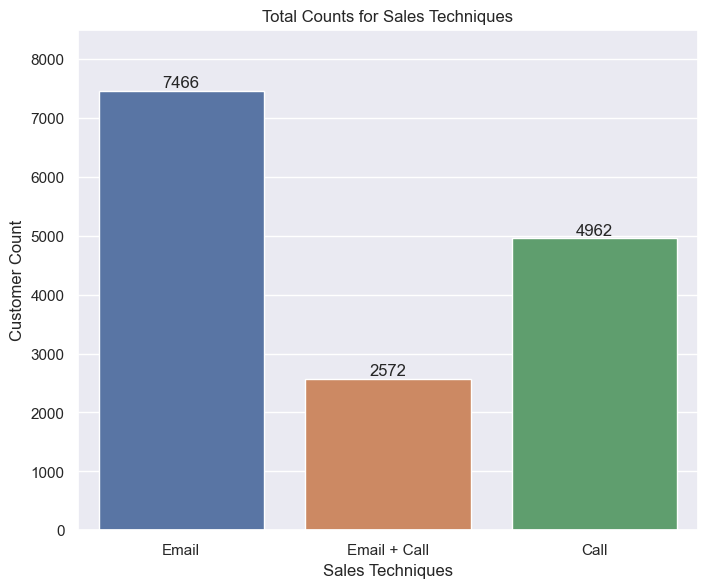

In [5]:
sns.set(rc={'figure.figsize': (8, 6.5)})
ax = sns.countplot(x=df['sales_method'])
ax.bar_label(ax.containers[0])
ax.set_ylim([0, 8500])
plt.ylabel('Customer Count')
plt.xlabel('Sales Techniques')
plt.title('Total Counts for Sales Techniques')
plt.show()

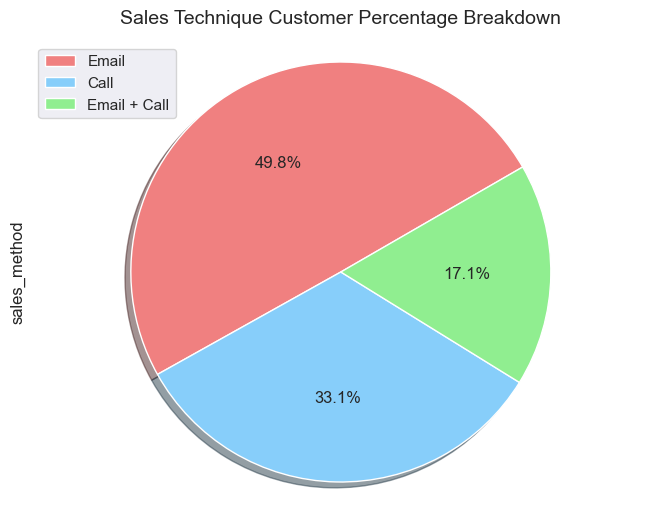

In [6]:
df['sales_method'].value_counts().plot(kind='pie',
                       figsize=(8,6),
                       autopct='%1.1f%%',
                       startangle=30,
                       labels=None,
                       colors=['lightcoral', 'lightskyblue', 'lightgreen'],
                       shadow=True)
plt.title('Sales Technique Customer Percentage Breakdown', y=1.02, size=14)
plt.legend(labels=df['sales_method'].value_counts().index, loc='upper left')
plt.axis('equal')
plt.show()

<br><br>

## How was Revenue Distributed?
Below the visualizations illustrate expected revenue ranges for our customers throughout the 6 week sales period with further classification by the `sales_method` and a further look into how revenue changed over the 6 week period.

<br>

### Overall Revenue Distribution
* On average, `revenue` saw a mean average of \$94 dollars regardless of sales technique used with a slighty lower median value of \$90 dollars.
* The spread of the middle 50% of values (25% first quartile and 75% third quartile) was \$55 dollars with the 75% quartile sitting at \$107 dollars and the 25% quartile sitting at \$52 dollars.
* Revenue values outsize of the expected range "outliers" trended higher which is great to see with a maximum revenue value seen at $238 dollars
* Our overall mean average \$94 dollar was slightly higher than the median  average of \$90 dollars

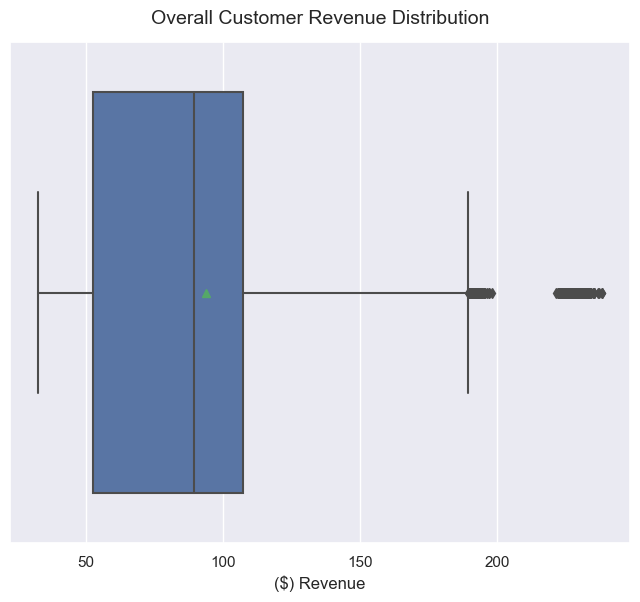

In [8]:
sns.set(rc={'figure.figsize': (8, 6.5)})
sns.boxplot(x=df['revenue'], showmeans=True)
plt.xlabel('($) Revenue', size=12)
plt.title('Overall Customer Revenue Distribution', size=14, y=1.02)
plt.show()

<br>

### Revenue Distribution by Sales Methods
* A Combined `Email + Call` sales method saw higher average revenue for our customers with the caveat of higher variability for the method. This is is illustrated in the larger width and apparent waves seen at varying revenue values for customers that had this sales_method applied.
* If utilizing a `Call` only method, we can expect significantly smaller average revenue amounts with marginal variability. Nearly 75% of all seen revenue amounts per customer with this sales_method was \$53 dollars or less.
* A `Email` only approach had an average revenue amount nearly double (\$95 for email, \$49 for call) that of just a `Call`. This approach did see higher upside values, however, at a lower customer frequency, with nearly 75% of all seen revenue amounts per customer at \$105 dollars or fewer.     

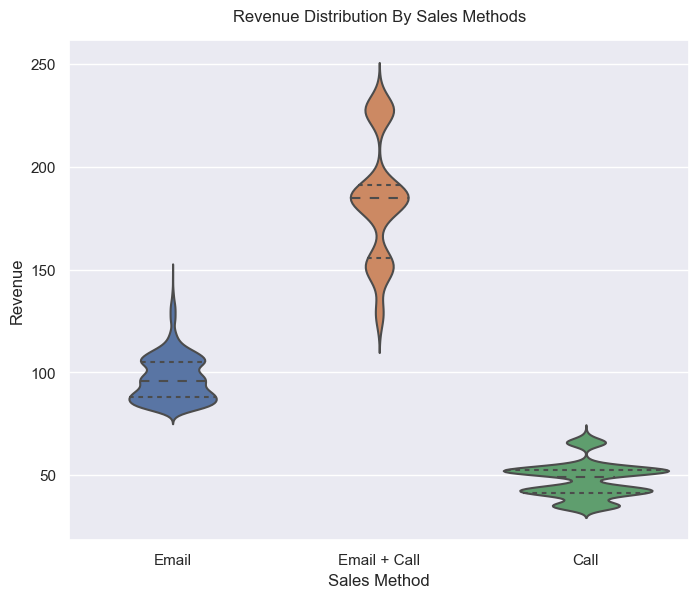

In [9]:
sns.set(rc={'figure.figsize': (8, 6.5)})
sns.violinplot(data=df, x='sales_method', y='revenue', inner='quartiles')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue Distribution By Sales Methods', y=1.02)
plt.show()

<br>

### Revenue Proportional Distribution by Sales Methods
* The y-axis represents seen customer revenue values as a proportion (all values under the combined sales_method waves summing to 1 or 100%)
	* Ex. - A `Call` only method from our customer dataset saw a revenue amount of just more than \$50 dollars be responsible for about 2.5% of total revenue. 
* The larger density and proportional make-up by our standalone `sales_methods` highlight the higher total customers that each method saw above.
* Predicting revenue values look most common across the `Email` only `sales_method` with noted higher proportional waves at smaller intervals across the Revenue axis.
* As `Email + Call` as a `sales_method` only accounted for ~17% of the customers in our sales data, we see that despite its higher revenue amounts, the density and proportional makeup for this method contributed the least to overall revenue while having the most variability. 

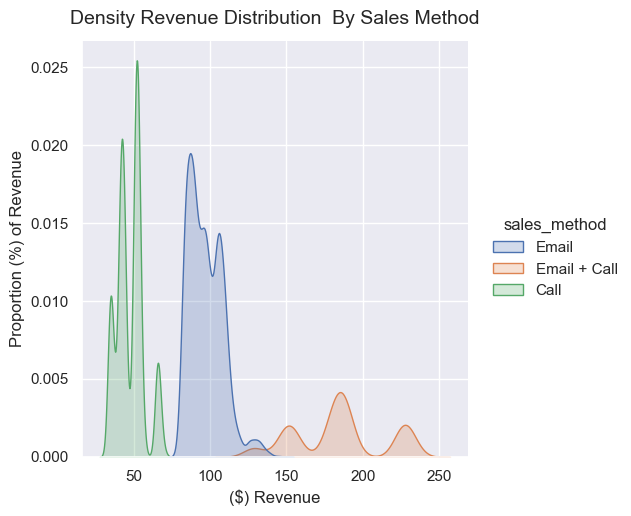

In [10]:
sns.set(rc={'figure.figsize': (12, 10.5)})
sns.displot(data=df, x='revenue', kind='kde', hue='sales_method', fill=True)
plt.xlabel('($) Revenue')
plt.ylabel('Proportion (%) of Revenue')
plt.title('Density Revenue Distribution  By Sales Method', size=14, y=1.02)
plt.show()

<br>

### Revenue Distribution Over Weekly Intervals
The revenue analysis below is summarized over the 6 weeks, how does that change when drilling deeper into the weekly averages?

* Recall that `week` value for a customer counted as weeks since product launch and thus a customer record with week value of 6 would denote the last week of the new product launch sales data available.
* Regardless of the week, the `sales_method` average values per week held the same ranking in revenue seen that we saw above with the combined method having the highest averages and the `call` method having the lowest average.
* In the last week of the sales data since the new product line launch, the average revenue seen per customer had its' highest jump with the combined approach showing a noticeable spike! 
* The final visualization in this section denotes each customer by the week with the Revenue seen for the customer colored by the `sales_method` applied to the customer.
	* We see tight bunches for our customers grouped by the `sales_method` providing insight on the variability by week

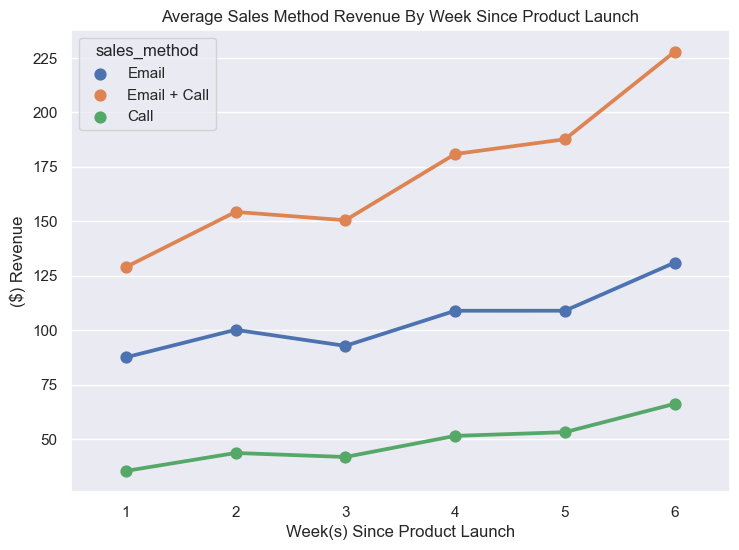

In [11]:
sns.set(rc={'figure.figsize': (8.5, 6)})
sns.pointplot(data=df, x='week', y='revenue', hue='sales_method')
plt.xlabel('Week(s) Since Product Launch')
plt.ylabel('($) Revenue')
plt.title('Average Sales Method Revenue By Week Since Product Launch')
plt.show()

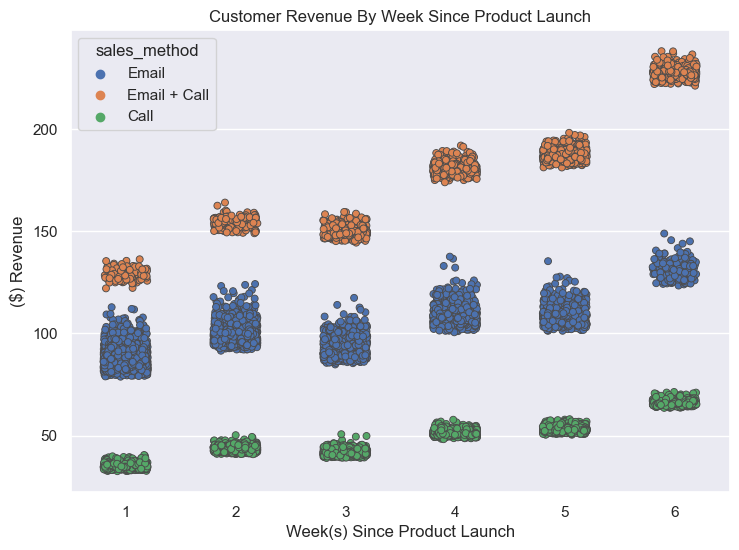

In [25]:
sns.set(rc={'figure.figsize': (8.5, 6)})
sns.stripplot(data=df, x='week', y='revenue', hue='sales_method', jitter=.2, linewidth=.65)
plt.xlabel('Week(s) Since Product Launch')
plt.ylabel('($) Revenue')
plt.title('Customer Revenue By Week Since Product Launch')
plt.show()

<br>

## Further Customer Insights
The following visualizations will look into different customer data points to see how **revenue**, **new products sold**, and **years_as_customer** among other customer characteristics shaped our sales data for the new product launch period.

<br>

### Revenue for Customers By Sales Method & Customer Website Visits
* There is a noticeable positive linear progression for our customers' activity or site visits contributing to higher average sales for the different sales methods used. 
* Customers were grouped "bucketed" together by the number of visits to the site. 

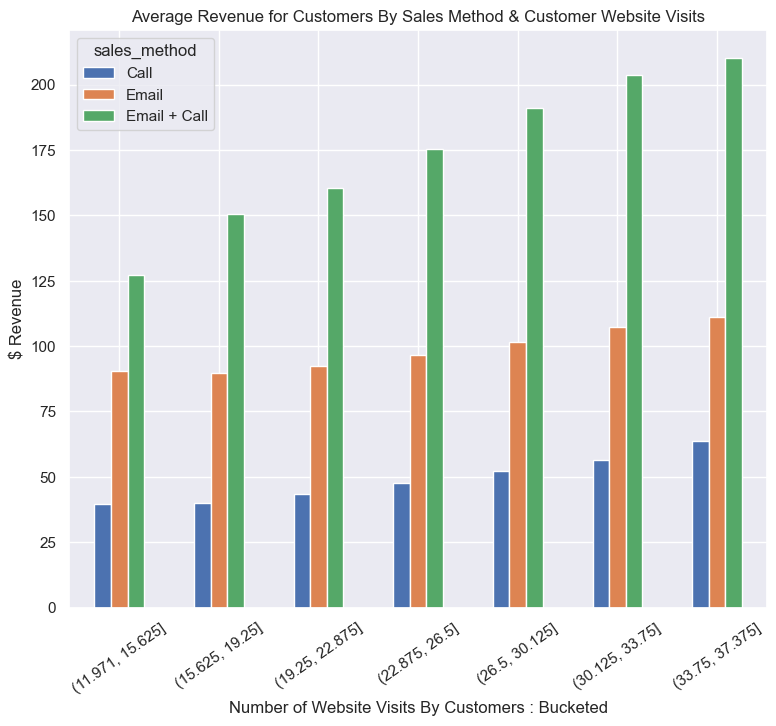

In [10]:
customer_df = df.copy()
customer_df['nb_site_visits_buckets'] = pd.cut(customer_df['nb_site_visits'], 8)
nb_sites_cdata = pd.pivot_table(customer_df, values='revenue', index='nb_site_visits_buckets', columns='sales_method')
nb_sites_cdata.plot(kind='bar',
                  figsize=(9, 7.5))
plt.ylabel('$ Revenue')
plt.xlabel('Number of Website Visits By Customers : Bucketed')
plt.xticks(rotation=35)
plt.title('Average Revenue for Customers By Sales Method & Customer Website Visits')
plt.show()

<br>

### Number of New Products Sold Proportional Distribution
* Below illustrates the proportion or count of observations (# of new product sold) falling below each unique value in a dataset.
	* Ex : 75% of customers bought 11 or less new products from our 6 week new product launch customer sales data 

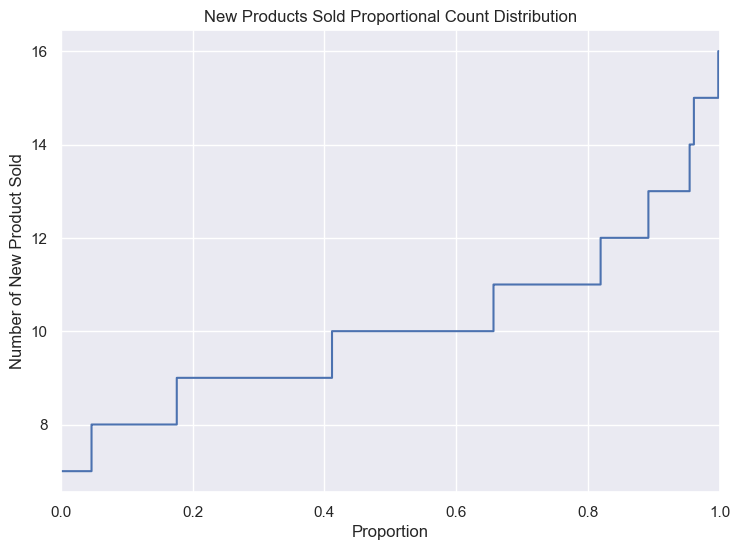

In [11]:
sns.set(rc={'figure.figsize': (8.5, 6)})
sns.ecdfplot(data=df, y='nb_sold')
plt.title('New Products Sold Proportional Count Distribution')
plt.xlabel('Proportion')
plt.ylabel('Number of New Product Sold')
plt.show()

### # of New Products Sold Impact on Revenue By Sales Method
* A deeper look at how number of new products sold to customers approached with different sales_methods is seen below. 
* Each point for the different sales_method represents the mean average of revenue seen for that particular number of new items sold for the grouped customers by sales_method and number of new items sold.

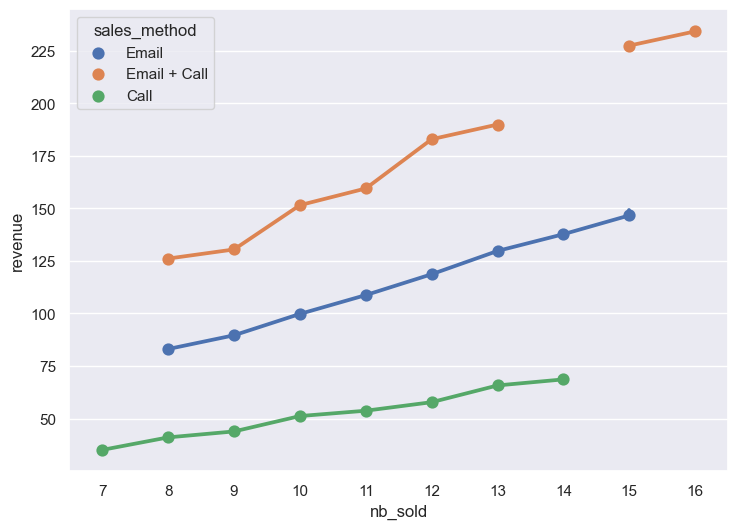

In [16]:
customer_df.head(2)
sns.pointplot(data=df, x='nb_sold', y='revenue', hue='sales_method', join=True)
plt.show()

<br>

### Customer State Data for New Products Sold & Revenue Distribution
* The following two visualizations aggregate the sum of `nb_sold` (# of new products sold) and sum of `revenue` by each customer's state to provide a view into which states account for the most revenue and highest # of new products sold
* Each visualization below looks fairly similar for each aggregate count for revenue and # of new products sold with a few exceptions like **Wyoming** which shows smaller revenue proportion but higher proportion of total new products sold

In [41]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


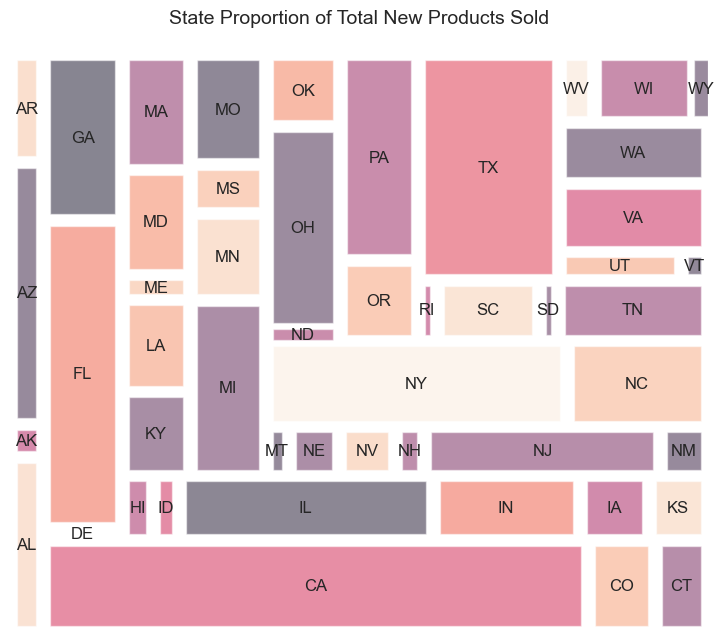

In [42]:
import squarify as sq
# Double checked the order from groupby return for the N states to accurately add the state abbreviation (double check with state column)
states = [ 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
           'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
           'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND' ,'OH', 'OK', 'OR', 
           'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_items_nbsold = customer_df.groupby('state')['nb_sold'].agg('sum')
state_items_nbsold = state_items_nbsold.to_frame()
state_items_nbsold['state'] = state_items_nbsold.index.values
state_items_nbsold['state_abbrev'] = states
sq.plot(state_items_nbsold['nb_sold'], label=state_items_nbsold['state_abbrev'], pad=True, alpha=.5)
plt.title('State Proportion of Total New Products Sold', y=1.04, size=14)
plt.axis('off')
plt.show()

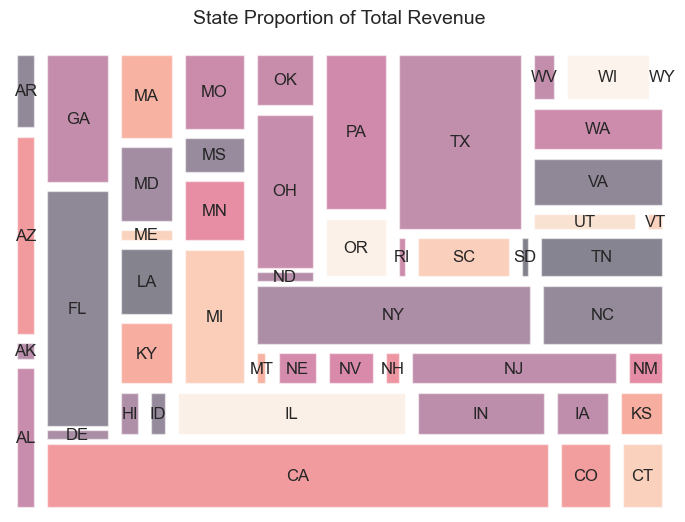

In [28]:
states = [ 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
           'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
           'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND' ,'OH', 'OK', 'OR', 
           'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
state_revenue_sum = customer_df.groupby('state')['revenue'].agg('sum')
state_revenue_sum = state_revenue_sum.to_frame()
state_revenue_sum['state'] = state_revenue_sum.index.values
state_revenue_sum['state_abbrev'] = states
sq.plot(state_revenue_sum['revenue'], label=state_revenue_sum['state_abbrev'], pad=True, alpha=.5)
plt.title('State Proportion of Total Revenue', y=1.04, size=14)
plt.axis('off')
plt.show()

<br>

### Customer Sales Technique Proportional Breakdown for No Revenue
* Similar to the pie chart above showing how the overall 15K customers were approached by sales technique, the similar figure below looks at the customer data for the 1,074 customers in the dataset that had no associated revenue for the customer
* No noticeable difference in the overall proportional breakdown can be seen for customers who did not have revenue with the proportional breakdown on the `sales_method`.
	* No evidence that a particular `sales_method` used would impact whether revenue was seen for the customer or not

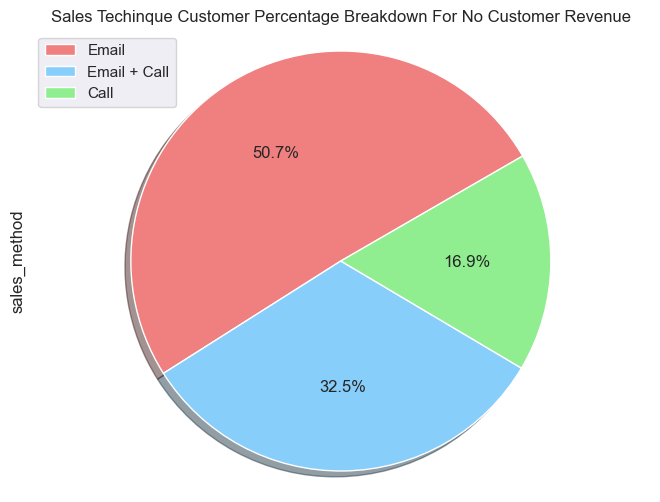

In [36]:
no_revenue = customer_df[customer_df['revenue'].isna()]
no_revenue['sales_method'].value_counts().plot(kind='pie',
                                              figsize=(8,6),
                                              autopct='%1.1f%%',
                                              startangle=30,
                                              labels=None,
                                              colors=['lightcoral', 'lightskyblue', 'lightgreen'],
                                              shadow=True)
plt.title('Sales Techinque Customer Percentage Breakdown For No Customer Revenue')
plt.legend(labels=no_revenue['sales_method'].value_counts().index, loc='upper left')
plt.axis('equal')
plt.show()

<br>

### Customer Revenue Distribution By Years As Customer
* The Density curve shown below details how customers grouped by years as a customer account for overall revenue distribution
* It is important to note that while it only appears **newer** customers account for revenue, the following proportions for customers grouped by `years_as_customer` are as follows. Over **99%** of customers have been a customers for 25 years or less. 
	* (-0.063, 12.6]  :  0.919200 or roughly **91.9%** of customers
	* (12.6, 25.2]    :  0.073867 or roughly **7.4%** of customers
	* (25.2, 37.8]    :  0.006467 or roughly **.65%** of customers
	* (37.8, 50.4]    :  0.000400 or roughly **.04%** of customers
	* (50.4, 63.0]    :  0.000067 or roughly **.007%** of customers

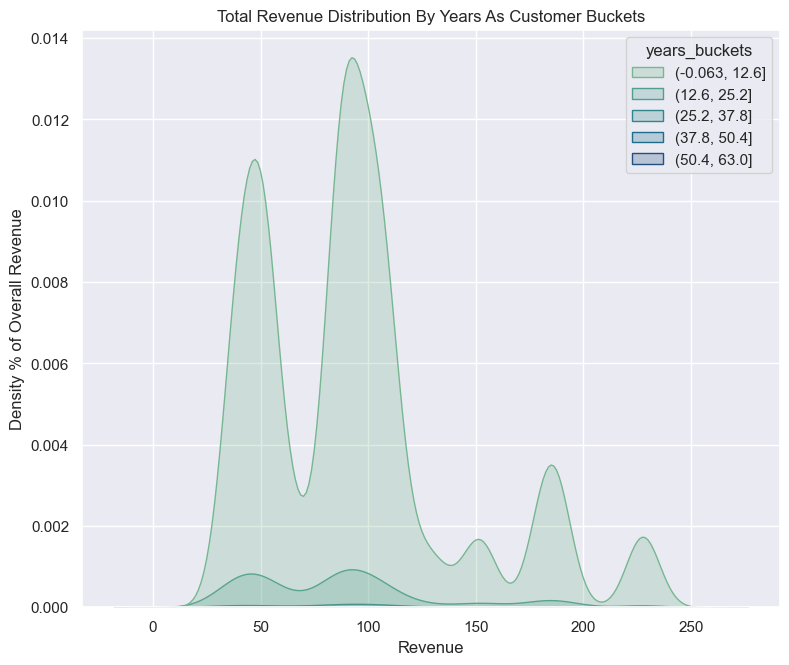

In [40]:
customer_df['years_buckets'] = pd.cut(customer_df['years_as_customer'], 5)
sns.set(rc={'figure.figsize': (9, 7.5)})
sns.kdeplot(data=customer_df, x='revenue', hue='years_buckets', fill=True, palette='crest', alpha=.25)
plt.xlabel('Revenue')
plt.ylabel('Density % of Overall Revenue')
plt.title('Total Revenue Distribution By Years As Customer Buckets')
plt.show()

<br><br>

## Business Metrics & Analysis Review

### Business Metric
* With an objective of seeking out the most profitable `sales_method` for the new product line, I would recommend we use the **revenue distribution or five-number summary box/violin-plot by sales_method** as our guiding metric for `sales_method` implementation for customer outreach in future sales cycles with an emphasis on **average revenue seen for sales method**. Assessing the metric's and visualization wider waves within the `sales_method` will also help visualize the potential variability in revenue seen as a measure of higher or lower upside. 

#### Metric with Observed Data
* Based on the 6 week sales data provided, the combined method of `Email + Call` had the highest average revenue returns per customer along with the highest upside in revenue across the three techniques. Therefore, if the current proportional distribution of only about 17% of all customers being approached with this technique is increased, an increase in revenue is likely to follow with a higher overall average revenue amount per customer.
* This would correspond with a decrease in the `Call` only method which currently account for about a 1/3 of all customers.
* Similarly the `Email` only approach about double the average revenue of just a `Call` as well as higher revenue upside.

#### Future Customer Data Consideration
* As spent customer time was noted for different `sales_methods`, collecting a customer value of total time spent (perhaps minutes) with future data collection would help better associate a revenue amount to time spent per customer.

<br>

### Analysis Review
* `Call` only sales_method has very limited average revenue with very little variability and upside.
* If selecting a single `sale_method` approach, an `email` has nearly double average revenue seen per customer (than `call` by itself) as well as higher upside with marginal downside for revenue in comparison.
* Convenience certainly seems to favor an `Email` only approach with nearly half of our customers being approached with that standalone technique. Only 17% of all customers were approached with the combined technique with the remaining 33% of customers using the standalone `Call` method.
* Over the 6 week duration of customer sales data collected, the combined `Call + Email` method saw a customer revenue average that started at around $125 dollars and ended over 100 dollars higher. This was marked by a significant spike between week 5 and 6.
	* Each `sales_method` saw its highest average net revenue gain between theses two weeks (5 & 6).
	* There was also a noticeable jump in average revenue across each sales method between weeks (1 & 2) and (3 & 4).
* States that had the highest proportion in number of new products sold also made up the bulk of the overall revenue distribution. Nothing too out of the ordinary here with a few exceptions like Wyoming which saw a higher share of new products sold but not a similar proportion of overall revenue.
* Following the overall rankings our business metric of average revenue by `sales_method`, the `number of new items` sold combined with the `sales_method` used helped illustrate the expected average revenue we can see for customers based on these two characteristics.
* About 7% of all cusotmers in the dataset did not detail any revenue, of those 7& of customers (about 1,100), the `sales_method` distribution used across the customers was very similar to the overall dataset of 15K cutomers. No tangible `sales_method` appeared to account for whether revenue was seen for a customer.
* Customer website visits show a positive linear progression for average revenue seen per customer by `sales_method`. Certain methods show higher revenue averages and gains as website visits increase but each method does show more won revenue as visits increase

<br>

### Recommendations
* Further Customer Data Collection
	* New Customer Data Collection : Generate `Revenue` to `Time Spent` per customer for greater sales efficiency
	* New Customer Data Collection : Generate average `Price per item` sold per customer for better understanding of what was purchased and if higher or lower items were purchased by customer approached with different techniques
* Adjust Sales Method Proportions Used on Customers
	* With a current (~50% - `Email`), (~33% - `Call`), (~17% - `Email + Call`) breakdown of customer `sales_methods`, an implementation favoring more `Email + Call` sales methods used on customers for subsequent sales cycles could be evaluated to see if higher average revenue would be seen across customers.
	* Look to remove `Call` as a standalone `sales_method`. Should time not be available for a significant proportion of our customers to be approached with a `Email + Call` method, an `Email` only approach should be used in lieu of a `Call`.
* Incentivize Customer Website Visits
	* Across all used `sales_methods`, a greater average revenue value was seen for customers with greater website visits.
	* Any coordinated marketing or campaign to faciliate greater website traffic for our customers can likely be expected to lead to higher revenue and more products sold.




## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation